<a href="https://colab.research.google.com/github/Yadav-Roshan/NLP/blob/main/05_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = '''Abraham Lincoln was an American lawyer, politician, and statesman who served as the 16th president of the United States from 1861 until his assassination in 1865. Lincoln led the Union through the American Civil War to defend the nation as a constitutional union and succeeded in abolishing slavery, bolstering the federal government, and modernizing the U.S. economy.
Lincoln was born into poverty in a log cabin in Kentucky and was raised on the frontier, primarily in Indiana. He was self-educated and became a lawyer, Whig Party leader, Illinois state legislator, and U.S. congressman from Illinois. In 1849, he returned to his successful law practice in Springfield, Illinois. In 1854, he was angered by the Kansas–Nebraska Act, which opened the territories to slavery, and he re-entered politics. He soon became a leader of the new Republican Party. He reached a national audience in the 1858 Senate campaign debates against Stephen A. Douglas. Lincoln ran for president in 1860, sweeping the North to gain victory. Pro-slavery elements in the South viewed his election as a threat to slavery, and Southern states began seceding from the nation. During this time, the newly formed Confederate States of America began seizing federal military bases in the south. Just over one month after Lincoln assumed the presidency, the Confederate States attacked Fort Sumter, a U.S. fort in South Carolina. Following the bombardment, Lincoln mobilized forces to suppress the rebellion and restore the union.'''

In [ ]:
text = nltk.sent_tokenize(text)[:5]
text

['Abraham Lincoln was an American lawyer, politician, and statesman who served as the 16th president of the United States from 1861 until his assassination in 1865.',
 'Lincoln led the Union through the American Civil War to defend the nation as a constitutional union and succeeded in abolishing slavery, bolstering the federal government, and modernizing the U.S. economy.',
 'Lincoln was born into poverty in a log cabin in Kentucky and was raised on the frontier, primarily in Indiana.',
 'He was self-educated and became a lawyer, Whig Party leader, Illinois state legislator, and U.S. congressman from Illinois.',
 'In 1849, he returned to his successful law practice in Springfield, Illinois.']

In [ ]:
word_list = []

for sentence in text:
  word_list.append(nltk.tokenize.word_tokenize(sentence))

word_list

[['Abraham',
  'Lincoln',
  'was',
  'an',
  'American',
  'lawyer',
  ',',
  'politician',
  ',',
  'and',
  'statesman',
  'who',
  'served',
  'as',
  'the',
  '16th',
  'president',
  'of',
  'the',
  'United',
  'States',
  'from',
  '1861',
  'until',
  'his',
  'assassination',
  'in',
  '1865',
  '.'],
 ['Lincoln',
  'led',
  'the',
  'Union',
  'through',
  'the',
  'American',
  'Civil',
  'War',
  'to',
  'defend',
  'the',
  'nation',
  'as',
  'a',
  'constitutional',
  'union',
  'and',
  'succeeded',
  'in',
  'abolishing',
  'slavery',
  ',',
  'bolstering',
  'the',
  'federal',
  'government',
  ',',
  'and',
  'modernizing',
  'the',
  'U.S.',
  'economy',
  '.'],
 ['Lincoln',
  'was',
  'born',
  'into',
  'poverty',
  'in',
  'a',
  'log',
  'cabin',
  'in',
  'Kentucky',
  'and',
  'was',
  'raised',
  'on',
  'the',
  'frontier',
  ',',
  'primarily',
  'in',
  'Indiana',
  '.'],
 ['He',
  'was',
  'self-educated',
  'and',
  'became',
  'a',
  'lawyer',
  ',',
 

In [ ]:
model = Word2Vec(word_list, min_count = 1)

In [ ]:
model.wv.similarity("American", "Lincoln")

0.08046818

In [ ]:
model.wv.most_similar("American", topn = 5)

[('1865', 0.19607563316822052),
 ('he', 0.19080370664596558),
 ('Indiana', 0.18401622772216797),
 ('president', 0.158564954996109),
 ('economy', 0.13746218383312225)]

In [ ]:
vocab = list(model.wv.key_to_index)

X_vocab = model.wv[vocab]
X_vocab

array([[-6.1645836e-04,  3.1372785e-04,  5.0316607e-03, ...,
        -7.0834155e-03,  8.7708188e-04,  6.3362722e-03],
       [-8.6766742e-03,  3.7200984e-03,  5.1227505e-03, ...,
        -2.4049487e-03, -9.5464690e-03,  4.4809799e-03],
       [ 3.2324162e-05,  3.1184221e-03, -6.8607349e-03, ...,
         4.8167017e-04,  8.1905704e-03, -7.0579620e-03],
       ...,
       [-6.3096249e-04,  1.4272518e-03, -1.2067524e-03, ...,
        -3.2250308e-03, -4.6509709e-03, -4.3975082e-03],
       [ 3.0791182e-03, -9.8449318e-03,  3.2193474e-03, ...,
         7.5797923e-03, -6.4313123e-03, -7.8946790e-03],
       [-7.2095953e-03,  6.3295229e-03, -2.0006499e-03, ...,
        -2.9701358e-03, -5.8179363e-03,  3.7200840e-03]], dtype=float32)

In [ ]:
len(vocab)

76

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tsne = TSNE(n_components = 2)
tsne_vocab = tsne.fit_transform(X_vocab)

In [ ]:
df = pd.DataFrame(tsne_vocab, index = vocab, columns = ['X', 'Y'])

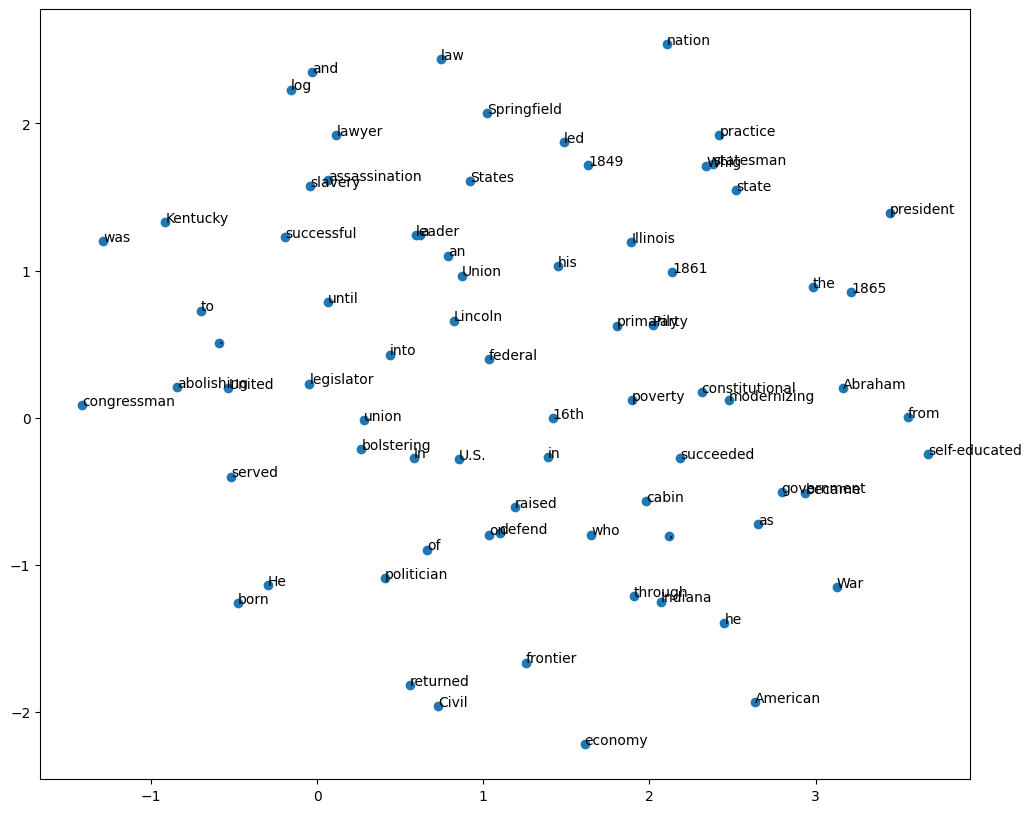

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['X'], df['Y'])

for word, pos in df.iterrows():
  ax.annotate(word, pos)

plt.show()

In [ ]:
!gunzip "/content/drive/MyDrive/SEM 5/NLP/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
import gensim

In [ ]:
google_model = gensim.models.KeyedVectors.load_word2vec_format(
    "/content/drive/MyDrive/SEM 5/NLP/GoogleNews-vectors-negative300.bin",
    binary = True
)

In [ ]:
google_model.most_similar("Zeppelin", topn = 10)

[('Led_Zeppelin', 0.6510995030403137),
 ('Led_Zep', 0.6348124742507935),
 ('Led_Zepplin', 0.5772966146469116),
 ('German_dirigible_Graf', 0.5731176137924194),
 ('Krautrock', 0.5636708736419678),
 ('LED_ZEPPELIN', 0.5564904808998108),
 ('krautrock', 0.5467159152030945),
 ('Velvets', 0.5436124205589294),
 ('Kraftwerk', 0.5432784557342529),
 ('Led_Zepp', 0.5378612875938416)]